<div style="text-align:center; background-color:#f0f0f0; padding:20px; border-radius:10px;">
    <h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#333; font-size:3em; font-weight:bold;">Data-related Innovation in Finance</h1>
    <p style="font-family: 'Garamond', serif; font-size:1.5em; color:#555; margin-top:0;">Personal Analysis of Stocks & Cryptocurrencies</p>
    <p style="font-family: 'Arial', sans-serif; font-size:1.2em; color:#777; margin-top:0;">Author: Antoine BUFFANDEAU</p>
</div>

<div class="alert alert-block alert-info" style = "font-family: Cambria Math;font-size: 115%; color: black; background-color: #e6f9ff; border: dashed black 1.0px; padding: 3.5px" >
The rendering (display/design) of this notebbok <b>doesn't function</b> properly on </b>Google Collab!</b>  
Please open it on Visual Studio Code for better rendering.
</div>

<div style="font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:120%; text-align:left;padding:3.0px; background: #cceeff; border-bottom: 8px solid #004466">

## TABLE OF CONTENTS

</div>

* [PACKAGE IMPORTS](#1)
* [FUNCTIONS](#2)
* [Network Analysis of Stocks](#3)
    * [Import of historical data for CAC40 components from 2018 to 2023](#3a)
* [Network Analysis of Cryptocurrencies](#4)
* [Modelling and Assessing Financial Contagion and Stability](#5)

<a id="1"></a>
# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#ffffff; font-size:120%; text-align:left;padding:3.0px; background: #003380; border-bottom: 10px solid #80ffff">PACKAGE IMPORTS<br></div>

In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
print("Numpy version:",np.__version__)
print("Pandas version:", pd.__version__)
print("Yahoo Finance version:", yf.__version__)
print("NetWorkX:", nx.__version__)
print("Seaborn version:", sns.__version__)

Numpy version: 1.26.4
Pandas version: 2.2.1
Yahoo Finance version: 0.2.44
NetWorkX: 3.3
Seaborn version: 0.13.2


<a id="2"></a>
# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#ffffff; font-size:120%; text-align:left;padding:3.0px; background: #003380; border-bottom: 10px solid #80ffff">FUNCTIONS<br></div>

In [33]:
def plot_heatmap(matrix, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

def stronger_corr(matrix):
    corr_pairs = matrix.unstack()
    filtered_corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
    sorted_corr_pairs = filtered_corr_pairs.sort_values(ascending=False)
    top_10_correlations = sorted_corr_pairs.head(10)
    print("Top 10 strongest correlations:")
    print(top_10_correlations)

<a id="3"></a>
# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#ffffff; font-size:120%; text-align:left;padding:3.0px; background: #003380; border-bottom: 10px solid #80ffff">Network Analysis of Stocks<br></div>

<a id="3a"></a>
## <div style="font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#ffffff; font-size:120%; text-align:left; padding:3.0px; background: #6495ED; border-bottom: 10px solid #80ffff">Import of historical data for CAC40 components from 2018 to 2023<br></div>

| Companies                        | Ticker Yahoo       | 2018 | 2019 | 2020 | 2021 | 2022 | 2023 | 2024 |
|------------------------------------|--------------------|------|------|------|------|------|------|------|
| Accor                              | AC.PA              | X    | X    | X    | X    | X    | X    | X    |
| Airbus                             | AIR.PA             | X    | X    | X    | X    | X    | X    | X    |
| Air Liquide                        | AI.PA              | X    | X    | X    | X    | X    | X    | X    |
| Alstom                             | ALO.PA             | X    | X    | X    | X    | X    | X    | X    |
| ArcelorMittal                      | MT.AS              | X    | X    | X    | X    |      |      |      |
| Atos                               | ATO.PA             | X    | X    | X    | X    |      |      |      |
| Axa                                | CS.PA              | X    | X    | X    | X    | X    | X    | X    |
| BNP Paribas                        | BNP.PA             | X    | X    | X    | X    | X    | X    | X    |
| Bouygues                           | EN.PA              | X    | X    | X    | X    | X    | X    | X    |
| Capgemini                          | CAP.PA             | X    | X    | X    | X    | X    | X    | X    |
| Carrefour                          | CA.PA              | X    | X    | X    | X    | X    | X    | X    |
| Crédit Agricole                    | ACA.PA             | X    | X    | X    | X    | X    | X    | X    |
| Danone                             | BN.PA              | X    | X    | X    | X    | X    | X    | X    |
| Dassault Systèmes                  | DSY.PA             | X    | X    | X    | X    | X    | X    | X    |
| Engie                              | ENGI.PA            | X    | X    | X    | X    | X    | X    | X    |
| Essilor/EssilorLuxottica           | EL.PA              | X    | X    | X    | X    | X    | X    | X    |
| Hermès                             | RMS.PA             | X    | X    | X    | X    | X    | X    | X    |
| Kering                             | KER.PA             | X    | X    | X    | X    | X    | X    | X    |
| L’Oréal                            | OR.PA              | X    | X    | X    | X    | X    | X    | X    |
| Legrand                            | LR.PA              | X    | X    | X    | X    | X    | X    | X    |
| LVMH                               | MC.PA              | X    | X    | X    | X    | X    | X    | X    |
| Michelin                           | ML.PA              | X    | X    | X    | X    | X    | X    | X    |
| Orange                             | ORA.PA             | X    | X    | X    | X    | X    | X    | X    |
| Pernod Ricard                      | RI.PA              | X    | X    | X    | X    | X    | X    | X    |
| Peugeot                            | UG.PA              | X    |      |      |      |      |      |      |
| Publicis                           | PUB.PA             | X    | X    | X    | X    | X    | X    | X    |
| Renault                            | RNO.PA             | X    | X    | X    | X    | X    | X    | X    |
| Safran                             | SAF.PA             | X    | X    | X    | X    | X    | X    | X    |
| Saint-Gobain                       | SGO.PA             | X    | X    | X    | X    | X    | X    | X    |
| Sanofi                             | SAN.PA             | X    | X    | X    | X    | X    | X    | X    |
| Schneider Electric                 | SU.PA              | X    | X    | X    | X    | X    | X    | X    |
| Société Générale                   | GLE.PA             | X    | X    | X    | X    | X    | X    | X    |
| Solvay                             | SOLB.BR            | X    | X    |      |      |      |      |      |
| STMicroelectronics                 | STMPA.PA             | X    | X    | X    | X    | X    | X    | X    |
| TechnipFMC                         | FTI.PA             | X    | X    | X    |      |      |      |      |
| Thales                             | HO.PA              | X    | X    | X    | X    | X    | X    | X    |
| Total/TotalEnergies                | TTE.PA             | X    | X    | X    | X    | X    | X    | X    |
| Unibail-Rodamco-Westfield          | URW.PA             | X    | X    | X    | X    | X    | X    | X    |
| Valeo                              | FR.PA              | X    | X    | X    | X    | X    | X    | X    |
| Veolia                             | VIE.PA             | X    | X    | X    | X    | X    | X    | X    |
| Vinci                              | DG.PA              |      | X(N) | X    | X    | X    | X    | X    |
| Worldline                          | WLN.PA             |      |      | X(N) | X    | X    | X    | X    |
| Teleperformance                    | TEP.PA             |      |      | X(N) | X    | X    | X    | X    |
| Eurofins Scientific                | ERF.PA             |      |      |      | X(N) | X    | X    | X    |
| Stellantis                         | STLA.PA            |      |      |      |      | X(N) | X    | X    |


Comments : 

X : Indicates that the company was part of the CAC40 in that year ;

(N) : Indicates that a company entered the CAC40 for that year.

In [27]:
#I have arbitrarily chosen here to select only the stock names that remained in the CAC40 list from 2018 to 2023.
cac40_tickers = [
    'AC.PA',   # Accor
    'AI.PA',   # Air Liquide
    'AIR.PA',  # Airbus
    'ALO.PA',  # Alstom
    'BNP.PA',  # BNP Paribas
    'EN.PA',   # Bouygues
    'CAP.PA',  # Capgemini
    'CA.PA',   # Carrefour
    'ACA.PA',  # Crédit Agricole
    'BN.PA',   # Danone
    'DSY.PA',  # Dassault Systèmes
    'ENGI.PA', # Engie
    'EL.PA',   # EssilorLuxottica
    'RMS.PA',  # Hermès
    'KER.PA',  # Kering
    'OR.PA',   # L'Oréal
    'LR.PA',   # Legrand
    'MC.PA',   # LVMH
    'ML.PA',   # Michelin
    'ORA.PA',  # Orange
    'PUB.PA',  # Publicis
    'RI.PA',   # Pernod Ricard
    'SGO.PA',  # Saint-Gobain
    'SAN.PA',  # Sanofi
    'SU.PA',   # Schneider Electric
    'GLE.PA',  # Société Générale
    'STMPA.PA',  # STMicroelectronics
    'HO.PA',   # Thales
    'URW.PA',  # Unibail-Rodamco-Westfield
    'FR.PA',   # Valeo
    'VIE.PA',  # Veolia
]

In [28]:
data = yf.download(cac40_tickers, start='2018-01-01', end='2023-12-31')['Adj Close']
data.shape  #should have: 31 columns and less than 365*5 lines (because of workdays)

[*********************100%***********************]  31 of 31 completed


(1538, 31)

In [29]:
data.info

<bound method DataFrame.info of Ticker                         AC.PA     ACA.PA       AI.PA      AIR.PA  \
Date                                                                      
2018-01-02 00:00:00+00:00  39.639462   8.694453   68.072723   77.157585   
2018-01-03 00:00:00+00:00  39.484482   8.747355   68.593857   78.434998   
2018-01-04 00:00:00+00:00  39.748863   9.142557   70.157249   80.020119   
2018-01-05 00:00:00+00:00  39.903847   9.126998   70.743530   79.814972   
2018-01-08 00:00:00+00:00  40.459965   9.226577   71.525223   80.766052   
...                              ...        ...         ...         ...   
2023-12-21 00:00:00+00:00  33.655148  11.953912  157.903107  136.995956   
2023-12-22 00:00:00+00:00  33.713375  12.004350  158.457016  137.905823   
2023-12-27 00:00:00+00:00  33.664848  12.062260  157.974579  137.886047   
2023-12-28 00:00:00+00:00  33.538692  12.009953  157.420670  138.143173   
2023-12-29 00:00:00+00:00  33.577507  12.004350  157.349182  138.242

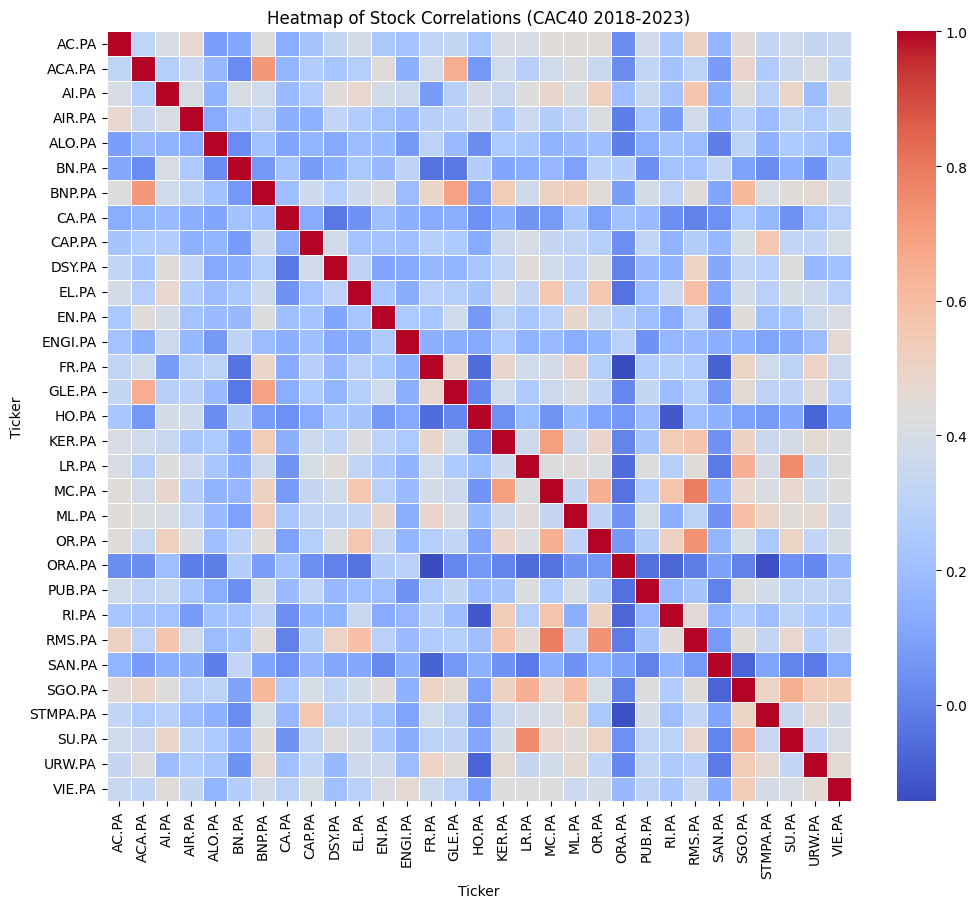

In [32]:
returns = data.pct_change().dropna()
correlation_matrix = returns.corr()

plot_heatmap(correlation_matrix, "Heatmap of Stock Correlations (CAC40 2018-2023)")

In [34]:
stronger_corr(correlation_matrix)

Top 10 strongest correlations:
Ticker  Ticker
RMS.PA  MC.PA     0.787993
MC.PA   RMS.PA    0.787993
SU.PA   LR.PA     0.753029
LR.PA   SU.PA     0.753029
OR.PA   RMS.PA    0.735497
RMS.PA  OR.PA     0.735497
BNP.PA  ACA.PA    0.716613
ACA.PA  BNP.PA    0.716613
MC.PA   KER.PA    0.698368
KER.PA  MC.PA     0.698368
dtype: float64


<a id="3b"></a>
## <div style="font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:#ffffff; font-size:120%; text-align:left; padding:3.0px; background: #6495ED; border-bottom: 10px solid #80ffff">The Stock Network<br></div>

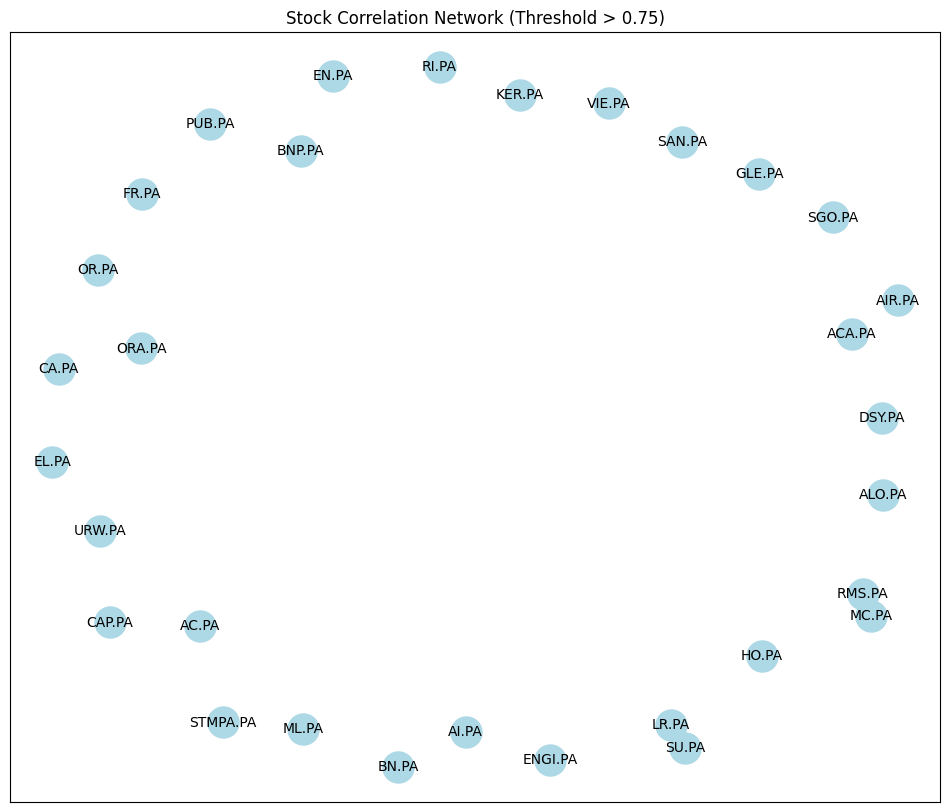

In [38]:
threshold = 0.75
G = nx.Graph()
G.add_nodes_from(correlation_matrix.columns)

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > threshold:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j],
                       weight=correlation_matrix.iloc[i, j])
            
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=500, node_color='lightblue', with_labels=True, font_size=10)
plt.title("Stock Correlation Network (Threshold > 0.75)")
plt.show()